# 巨量資料分析與導論期末報告

# 題目名稱: Stock Trend Prediction: Which is better?  
#                 (Based on Machine Learning Methods)
------------------------------

# 組員 : 戴啟航、吳冠錡、許睿庭
--------------------------

## 動機 :

> ### 隨著AI人工智慧越來越普及，利用機器學習或是深度學習的方式，來訓練模型，以達到預測或辨識的能力。
> ### 這次想利用各種技術面指標來幫助我們預測明日股價，採用兩種不同概念的機器學習模型 
> ### 1.   隨機森林
> ### 2.   LSTM
>
> ### 去比較兩種模型哪種效果比較好，以及探討背後預測力較高的原因。

---------------------------------------------------------
## 計畫摘要

> ### 1.深入研究LSTM跟Randforest的參數設定及計算方式
> ### 2.挑選股票測試
> ### 3.挑選技術面指標:KD、MACD、OBV、WILLR、ATR
> ### 4.用兩種機器模型去訓練
> ### 5.觀察預測結果是否如前面假設
> ### 6.修正與改善

---------------------------------------------------------

---------------------------------------------------------
## 資料來源

> ### 1.樣本資料:TEJ台灣經濟新報-敬鵬(未調整股價(日))
> ### 2.資料期間:2013~2018/6/25
> ### 3.資料頻率:日頻
> ### 4.選用方法:RF、LSTM、五種技術指標(KD、MACD、OBV、WILLR、ATR)

---------------------------------------------------------

------------------------------------------
## 在DEMO之前，我們先來了解一下RF、LSTM模型的概念

> ### 首先我們先介紹Rand Forest這個模型。
> ### Rand Forest主要是運用決策樹的概念，而決策樹是一個解釋力很強的模型。
> ### 舉例來說:有天阿錡和阿航在討論女生交往對象的條件，但是兩人意見不一致，因此直接去找他們的共同朋友阿睿問清楚。於是阿睿說:"如果是我的標準，首先我想要找年薪破百的男生，最好年齡介於25~30歲，還有滿足這些條件後我還想要..........等等"
> ### 於是他們將條件列出來後做了決策樹
> ### ![Alt text](https://i.imgur.com/jE3ienC.png/to/)

> ### 在Rand Forest訓練過程中，決策樹會問一系列的問題像是年薪是否超過100萬 ，年齡是否大於30或是小於25歲的是非問題。而決策樹就會向上圖一樣從第一個問題開始根據資料的特徵將資料分割到不同邊。

> ### ![Alt text](https://i.imgur.com/7S8EAb2.png/to/)
> ### 這樣的分割的目的是為了最大的資訊增益(Information gain, 簡稱IG)。上式為我們獲得的資訊量會等於原本的資訊量加上分割後的資訊量(而分割後又分為左邊和右邊的資訊)。而Rand Forest在機器學習中像是用眾人投票的方式去選出一個最好的，我們需要創造一些決策樹來進行投票!

> ### 雖然隨機森林中樹木的數量越多可以增加模型的效果，但是計算量相對也會增加，所以增加樹木的數量帶來的效果程度是遞減的，所以選擇一個合適的參數就可以了。
---------------------------------------------------------

> ### 接下來我們來了解一下LSTM背後的概念。
> ### LSTM(長短期記憶神經網絡)神經網路屬於循環神經網路 (RNN) 的一種，特別適合處理和預測與時間序列相關的重要事件。LSTM是利用過去一段時間內某事件時間的特徵來預測未來一段時間內該事件的特徵。這是一種比較複雜的預測模型，和迴歸分析模型的預測不同，LSTM是依賴於事件發生的先後順序以及同樣大小的值改變順序後輸入模型產生的結果。

> ### 舉例來說:我們可以根據過去2年victor高老師每週高血壓的數據推測下一周會出現高血壓的次數。同樣的道理根據過去兩年某股票的每天的股價數據推測之後一週的股價變化等等。

>### 而下列這張圖，是將簡單循環網路(RNN)和LSTM進行比對
![Alt text](https://i.imgur.com/GeO7j8t.png/to/)
資料來源:https://deeplearning4j.org/cn/lstm

>### 從圖中我們可以看到LSTM的記憶單元輸入並執行的過程中，LSTM的記憶單元在輸入轉換中給予加法和乘法不同的角色。兩張圖中央的加號其實就是LSTM的秘密。雖然看起來異常簡單，這一基本的改變能幫助LSTM在必須進行深度反向傳播時維持恆定的誤差。LSTM確定後續單元狀態的方式並非將當前狀態與新輸入相乘，而是將兩者相加，這正是LSTM的特別之處。

>### 而且LSTM的模型有設計三道閥門。而閥門有3類：遺忘閥門（forget gate），輸入閥門（input gate）和輸出閥門（output gate）。這些閥門可以打開或關閉，用於將判斷模型網絡的記憶態（之前網絡的狀態）在該層輸出的結果是否達到閾值從而加入到當前該層的計算中。


>### 那為甚麼需要設計遺忘門呢?

>### 假如今天你是要分析文檔資料，在文檔的末尾時。假設每個文檔並沒有關聯，但是在傳統的模型上會認為是一起的。此時LSTM會是你解決此問題的好選擇!你可以透過閘門關閉來避免程式拿上一筆資料的記憶來分析下一筆資料。

>### 我們來看看他的概念是怎麼運作，在下圖我們可以看到LSTM的運作方式

>###  關於閥門有分為三類:遺忘閥門（forget gate），輸入閥門（input gate）和輸出閥門（output gate）。
>###  ![Alt text](https://i.imgur.com/4bI98gE.png/to/)

>### 如圖中所示，閥門節點利用sigmoid函數將網絡的記憶態作為輸入計算；如果輸出結果達到閾值則將該閥門輸出與當前層的的計算結果相乘作為下一層的輸入（PS：這裏的相乘是在指矩陣中的逐元素相乘）；如果沒有達到閾值則將該輸出結果遺忘掉。每一層包括閥門節點的權重都會在每一次模型反向傳播訓練過程中更新。

>### 此方法的優點是通常前饋網絡只能將一個輸入映射至一個輸出，而循環網絡則可以向上圖那樣將一個輸入映射至出多個輸出或是進行多對多或多對一的映射。

>### 在後續DEMO中，我們採用股票過去的歷史股價，套用LSTM模型去預測下一個交易日的收盤價。



> # 開始DEMO囉!!

# Random Forest

In [10]:
import requests
import json
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

##  取得今日敬鵬股價

In [11]:
def get_today_price(stock, date):
    url='http://www.twse.com.tw/exchangeReport/STOCK_DAY'
    params = {}
    params['stockNo'] = stock
    params['date'] = date
    params['response'] = json
    res = requests.get(url, params=params)
    s = json.loads(res.text)
    rawData=pd.DataFrame(s['data'],columns=['日期', '成交股數', '成交金額', '開盤價','最高價','最低價','收盤價','漲跌價差','成交筆數'])
    return rawData

In [12]:
get_today_price(2355, 20180626)[-1:]

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
17,107/06/27,"726,787","28,131,949",38.60,38.90,38.50,38.55,0.00,421


In [13]:
import pandas as pd
df = pd.read_excel('bird.xlsx')
df.columns=['code','date','open','close','high','low','volume']
df.head()

,code,date,open,close,high,low,volume
0,2355,2013-01-02,32,32,32,31,1595
1,2355,2013-01-03,32,32,32,32,1552
2,2355,2013-01-04,32,32,32,32,1324
3,2355,2013-01-07,32,32,32,32,676
4,2355,2013-01-08,32,31,32,31,1006


In [14]:
ship= {
    'close':df.close.dropna().astype(float),
    'open':df.open.dropna().astype(float),
    'high':df.high.dropna().astype(float),
    'low':df.low.dropna().astype(float),
    'volume': df.volume.dropna().astype(float)}

##  計算技術指標(KD/MACD/OBV/WILLR/ATR)

In [15]:
import talib
def talib2df(talib_output):
    if type(talib_output) == list:
        ret = pd.DataFrame(talib_output).transpose()
    else:
        ret = pd.Series(talib_output)
    ret.index = df['close'].index
    return ret;

#計算KD#
KD = talib2df(talib.abstract.STOCH(ship, fastk_period=9))
#計算MACD#
MACD = talib2df(talib.abstract.MACD(ship))
#計算OBV#
OBV = talib2df(talib.abstract.OBV(ship))
#計算威廉指數#
WILLR = talib2df(talib.abstract.WILLR(ship))
#ATR 計算#
ATR = talib2df(talib.abstract.ATR(ship))
#alldata

In [16]:
ship=pd.DataFrame(ship)
ship= pd.concat([df,KD,MACD,OBV,WILLR,ATR], axis=1)
ship.columns=['code','date','open','close','high','low','volume','k','d','dif12','dif26','macd','obv','willr','atr']

## 機器學習預測 Randomforest

In [18]:
import numpy as np
import pandas as pd
from sklearn import model_selection, ensemble, preprocessing, metrics

In [19]:
ship.close.shift(1)
ship.close.shift(2)
ship.close.shift(3)
ship.close.shift(4)
ship.close.shift(5)
ship=pd.concat([ship,ship.close.shift(1),ship.close.shift(2),ship.close.shift(3),ship.close.shift(4),ship.close.shift(5)],axis=1)
ship.columns=['code','date','open','close','high','low','volume','k','d','dif12','dif26','macd','obv','willr','atr',
            'close_s1','close_s2','close_s3','close_s4','close_s5']
#下五天報酬報酬
ship['label']=( (ship.close.shift(-5)/ship.close)-1)>0 

# drop 5天
SHIP=ship
SHIP['label']=SHIP['label'].drop(SHIP['label'].tail(5).index)

0        NaN
1       32.0
2       32.0
3       32.0
4       32.0
5       31.0
6       32.0
7       31.0
8       31.0
9       31.0
10      31.0
11      31.0
12      30.0
13      30.0
14      30.0
15      31.0
16      31.0
17      31.0
18      30.0
19      30.0
20      31.0
21      31.0
22      31.0
23      31.0
24      32.0
25      33.0
26      33.0
27      33.0
28      33.0
29      33.0
        ... 
1312    41.0
1313    40.0
1314    40.0
1315    39.0
1316    40.0
1317    39.0
1318    40.0
1319    40.0
1320    40.0
1321    40.0
1322    40.0
1323    41.0
1324    41.0
1325    40.0
1326    40.0
1327    40.0
1328    40.0
1329    41.0
1330    43.0
1331    42.0
1332    41.0
1333    40.0
1334    40.0
1335    40.0
1336    40.0
1337    41.0
1338    40.0
1339    40.0
1340    39.0
1341    39.0
Name: close, Length: 1342, dtype: float64

0        NaN
1        NaN
2       32.0
3       32.0
4       32.0
5       32.0
6       31.0
7       32.0
8       31.0
9       31.0
10      31.0
11      31.0
12      31.0
13      30.0
14      30.0
15      30.0
16      31.0
17      31.0
18      31.0
19      30.0
20      30.0
21      31.0
22      31.0
23      31.0
24      31.0
25      32.0
26      33.0
27      33.0
28      33.0
29      33.0
        ... 
1312    39.0
1313    41.0
1314    40.0
1315    40.0
1316    39.0
1317    40.0
1318    39.0
1319    40.0
1320    40.0
1321    40.0
1322    40.0
1323    40.0
1324    41.0
1325    41.0
1326    40.0
1327    40.0
1328    40.0
1329    40.0
1330    41.0
1331    43.0
1332    42.0
1333    41.0
1334    40.0
1335    40.0
1336    40.0
1337    40.0
1338    41.0
1339    40.0
1340    40.0
1341    39.0
Name: close, Length: 1342, dtype: float64

0        NaN
1        NaN
2        NaN
3       32.0
4       32.0
5       32.0
6       32.0
7       31.0
8       32.0
9       31.0
10      31.0
11      31.0
12      31.0
13      31.0
14      30.0
15      30.0
16      30.0
17      31.0
18      31.0
19      31.0
20      30.0
21      30.0
22      31.0
23      31.0
24      31.0
25      31.0
26      32.0
27      33.0
28      33.0
29      33.0
        ... 
1312    39.0
1313    39.0
1314    41.0
1315    40.0
1316    40.0
1317    39.0
1318    40.0
1319    39.0
1320    40.0
1321    40.0
1322    40.0
1323    40.0
1324    40.0
1325    41.0
1326    41.0
1327    40.0
1328    40.0
1329    40.0
1330    40.0
1331    41.0
1332    43.0
1333    42.0
1334    41.0
1335    40.0
1336    40.0
1337    40.0
1338    40.0
1339    41.0
1340    40.0
1341    40.0
Name: close, Length: 1342, dtype: float64

0        NaN
1        NaN
2        NaN
3        NaN
4       32.0
5       32.0
6       32.0
7       32.0
8       31.0
9       32.0
10      31.0
11      31.0
12      31.0
13      31.0
14      31.0
15      30.0
16      30.0
17      30.0
18      31.0
19      31.0
20      31.0
21      30.0
22      30.0
23      31.0
24      31.0
25      31.0
26      31.0
27      32.0
28      33.0
29      33.0
        ... 
1312    39.0
1313    39.0
1314    39.0
1315    41.0
1316    40.0
1317    40.0
1318    39.0
1319    40.0
1320    39.0
1321    40.0
1322    40.0
1323    40.0
1324    40.0
1325    40.0
1326    41.0
1327    41.0
1328    40.0
1329    40.0
1330    40.0
1331    40.0
1332    41.0
1333    43.0
1334    42.0
1335    41.0
1336    40.0
1337    40.0
1338    40.0
1339    40.0
1340    41.0
1341    40.0
Name: close, Length: 1342, dtype: float64

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5       32.0
6       32.0
7       32.0
8       32.0
9       31.0
10      32.0
11      31.0
12      31.0
13      31.0
14      31.0
15      31.0
16      30.0
17      30.0
18      30.0
19      31.0
20      31.0
21      31.0
22      30.0
23      30.0
24      31.0
25      31.0
26      31.0
27      31.0
28      32.0
29      33.0
        ... 
1312    39.0
1313    39.0
1314    39.0
1315    39.0
1316    41.0
1317    40.0
1318    40.0
1319    39.0
1320    40.0
1321    39.0
1322    40.0
1323    40.0
1324    40.0
1325    40.0
1326    40.0
1327    41.0
1328    41.0
1329    40.0
1330    40.0
1331    40.0
1332    40.0
1333    41.0
1334    43.0
1335    42.0
1336    41.0
1337    40.0
1338    40.0
1339    40.0
1340    40.0
1341    41.0
Name: close, Length: 1342, dtype: float64

# 預測股價漲跌

In [20]:
SHIP = SHIP.dropna(axis=0)
ship_X = SHIP.drop(['label','code','date'],axis=1)
ship_y = SHIP['label']
label_encoder = preprocessing.LabelEncoder()
ship_y  = label_encoder.fit_transform(SHIP["label"])

train_X, test_X, train_y, test_y = model_selection.train_test_split(ship_X, ship_y, test_size = 0.2)
# 建立 random forest 模型
forest =  ensemble.RandomForestClassifier(n_estimators = 200)
forest_fit = forest.fit(train_X, train_y)

# 預測
test_y_predicted = forest.predict(test_X)
#test_y_predicted
# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print('AUC值: {}'.format(accuracy))

AUC值: 0.7969348659003831


## 計算出每一個參數的重要性

open = 0.0323580548105
close = 0.0438890953467
high = 0.0366961807885
low = 0.0372481438605
volume = 0.0647971402159
k = 0.052481709531
d = 0.0623467093336
dif26 = 0.0843554911431
macd = 0.0870683763009
obv = 0.0878579653658
willr = 0.107710265293
atr = 0.0429455130314
close_s1 = 0.0906360592934
close_s2 = 0.0299078135787
close_s3 = 0.031838903941
close_s4 = 0.0351580703495
close_s5 = 0.0354920055464
label = 0.0372125022701


Text(0.5,1,'Feature Importances')

<Container object of 18 artists>

([<matplotlib.axis.YTick at 0x26e364db668>,
 <a list of 18 Text yticklabel objects>)

Text(0.5,0,'Relative Importance')

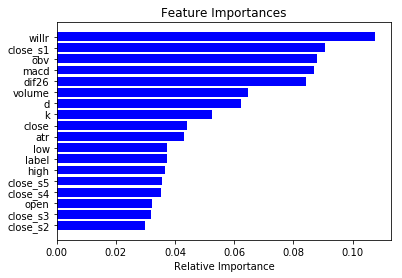

In [21]:
for name, importance in zip(SHIP.drop({'dif12'},axis=1).columns[2:24],forest.feature_importances_):
        print(name, "=", importance)
features = SHIP.drop({'dif12'},axis=1).columns[2:24]
importances = forest.feature_importances_
indices = np.argsort(importances)
#畫圖
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

#  預測股價價值(Randomforest)

In [22]:
ship2=ship

In [23]:
ship2['label']=ship.close.shift(-5)
ship2 = ship2.dropna(axis=0)
ship2 = ship2.dropna(axis=0)
ship_X = ship2.drop(['label','code','date'],axis=1)
ship_y = ship2['label']
train_X, test_X, train_y, test_y = model_selection.train_test_split(ship_X, ship_y, test_size = 0.1)

# 建立 random forest 模型

In [24]:
forest=ensemble.RandomForestClassifier(n_estimators = 300,criterion='entropy')
forest_fit=forest.fit(train_X, train_y.astype('int'))
# 預測
test_y_predicted = forest.predict(test_X)
#test_y_predicted
accuracy = metrics.accuracy_score(test_y.astype('int'), test_y_predicted)


#print(auc)
print('AUC值: {}'.format(accuracy))

AUC值: 0.37404580152671757


open = 0.0712576858036
close = 0.102296127294
high = 0.0832305152276
low = 0.0835861533399
volume = 0.0410360597036
k = 0.0348699209515
d = 0.04250626144
dif26 = 0.0548427951657
macd = 0.0579997228837
obv = 0.0487694847913
willr = 0.0608391813287
atr = 0.0303753833361
close_s1 = 0.0645412933112
close_s2 = 0.0693458003512
close_s3 = 0.0464943324759
close_s4 = 0.0375463545371
close_s5 = 0.034589292134
label = 0.0358736359245


Text(0.5,1,'Feature Importances')

<Container object of 18 artists>

([<matplotlib.axis.YTick at 0x26e36513ac8>,
 <a list of 18 Text yticklabel objects>)

Text(0.5,0,'Relative Importance')

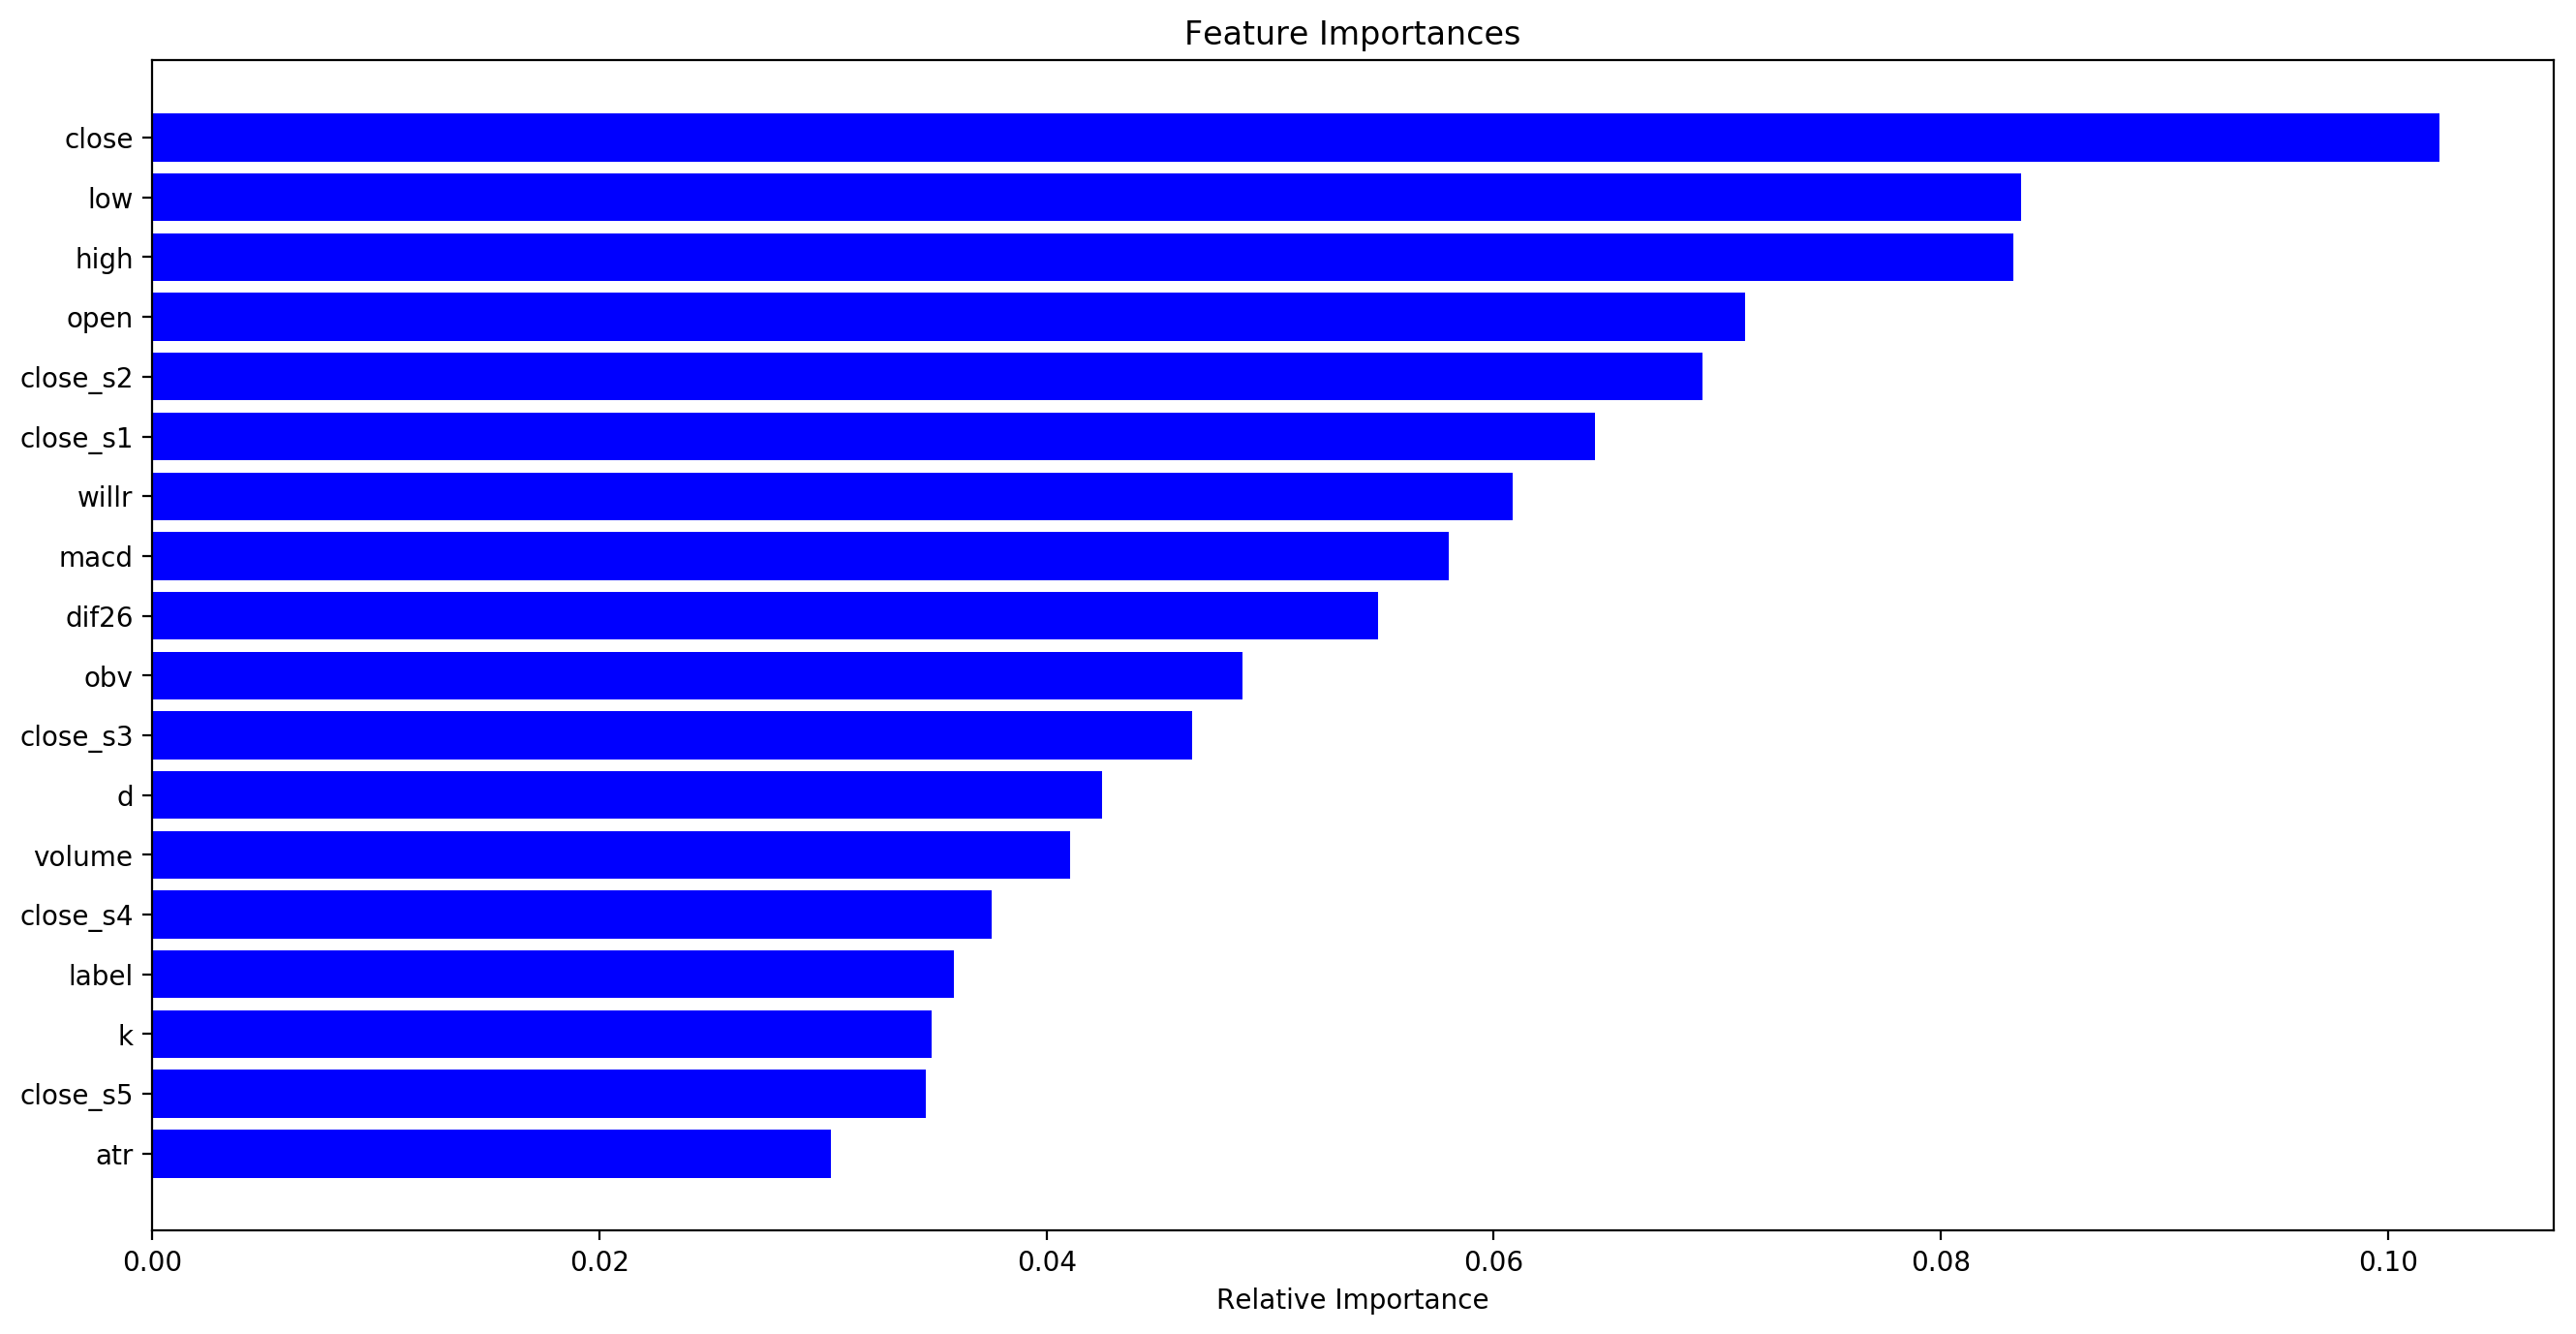

In [25]:
for name, importance in zip(ship2.drop({'dif12'},axis=1).columns[2:24],forest.feature_importances_):
        print(name, "=", importance)
features = ship2.drop({'dif12'},axis=1).columns[2:24]
importances = forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(16,8),dpi = 200)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [26]:
df1 = pd.DataFrame([])
df1['test_y'] = test_y
df1['predicted'] = test_y_predicted
df1.sort_index(inplace= True)

# 畫圖

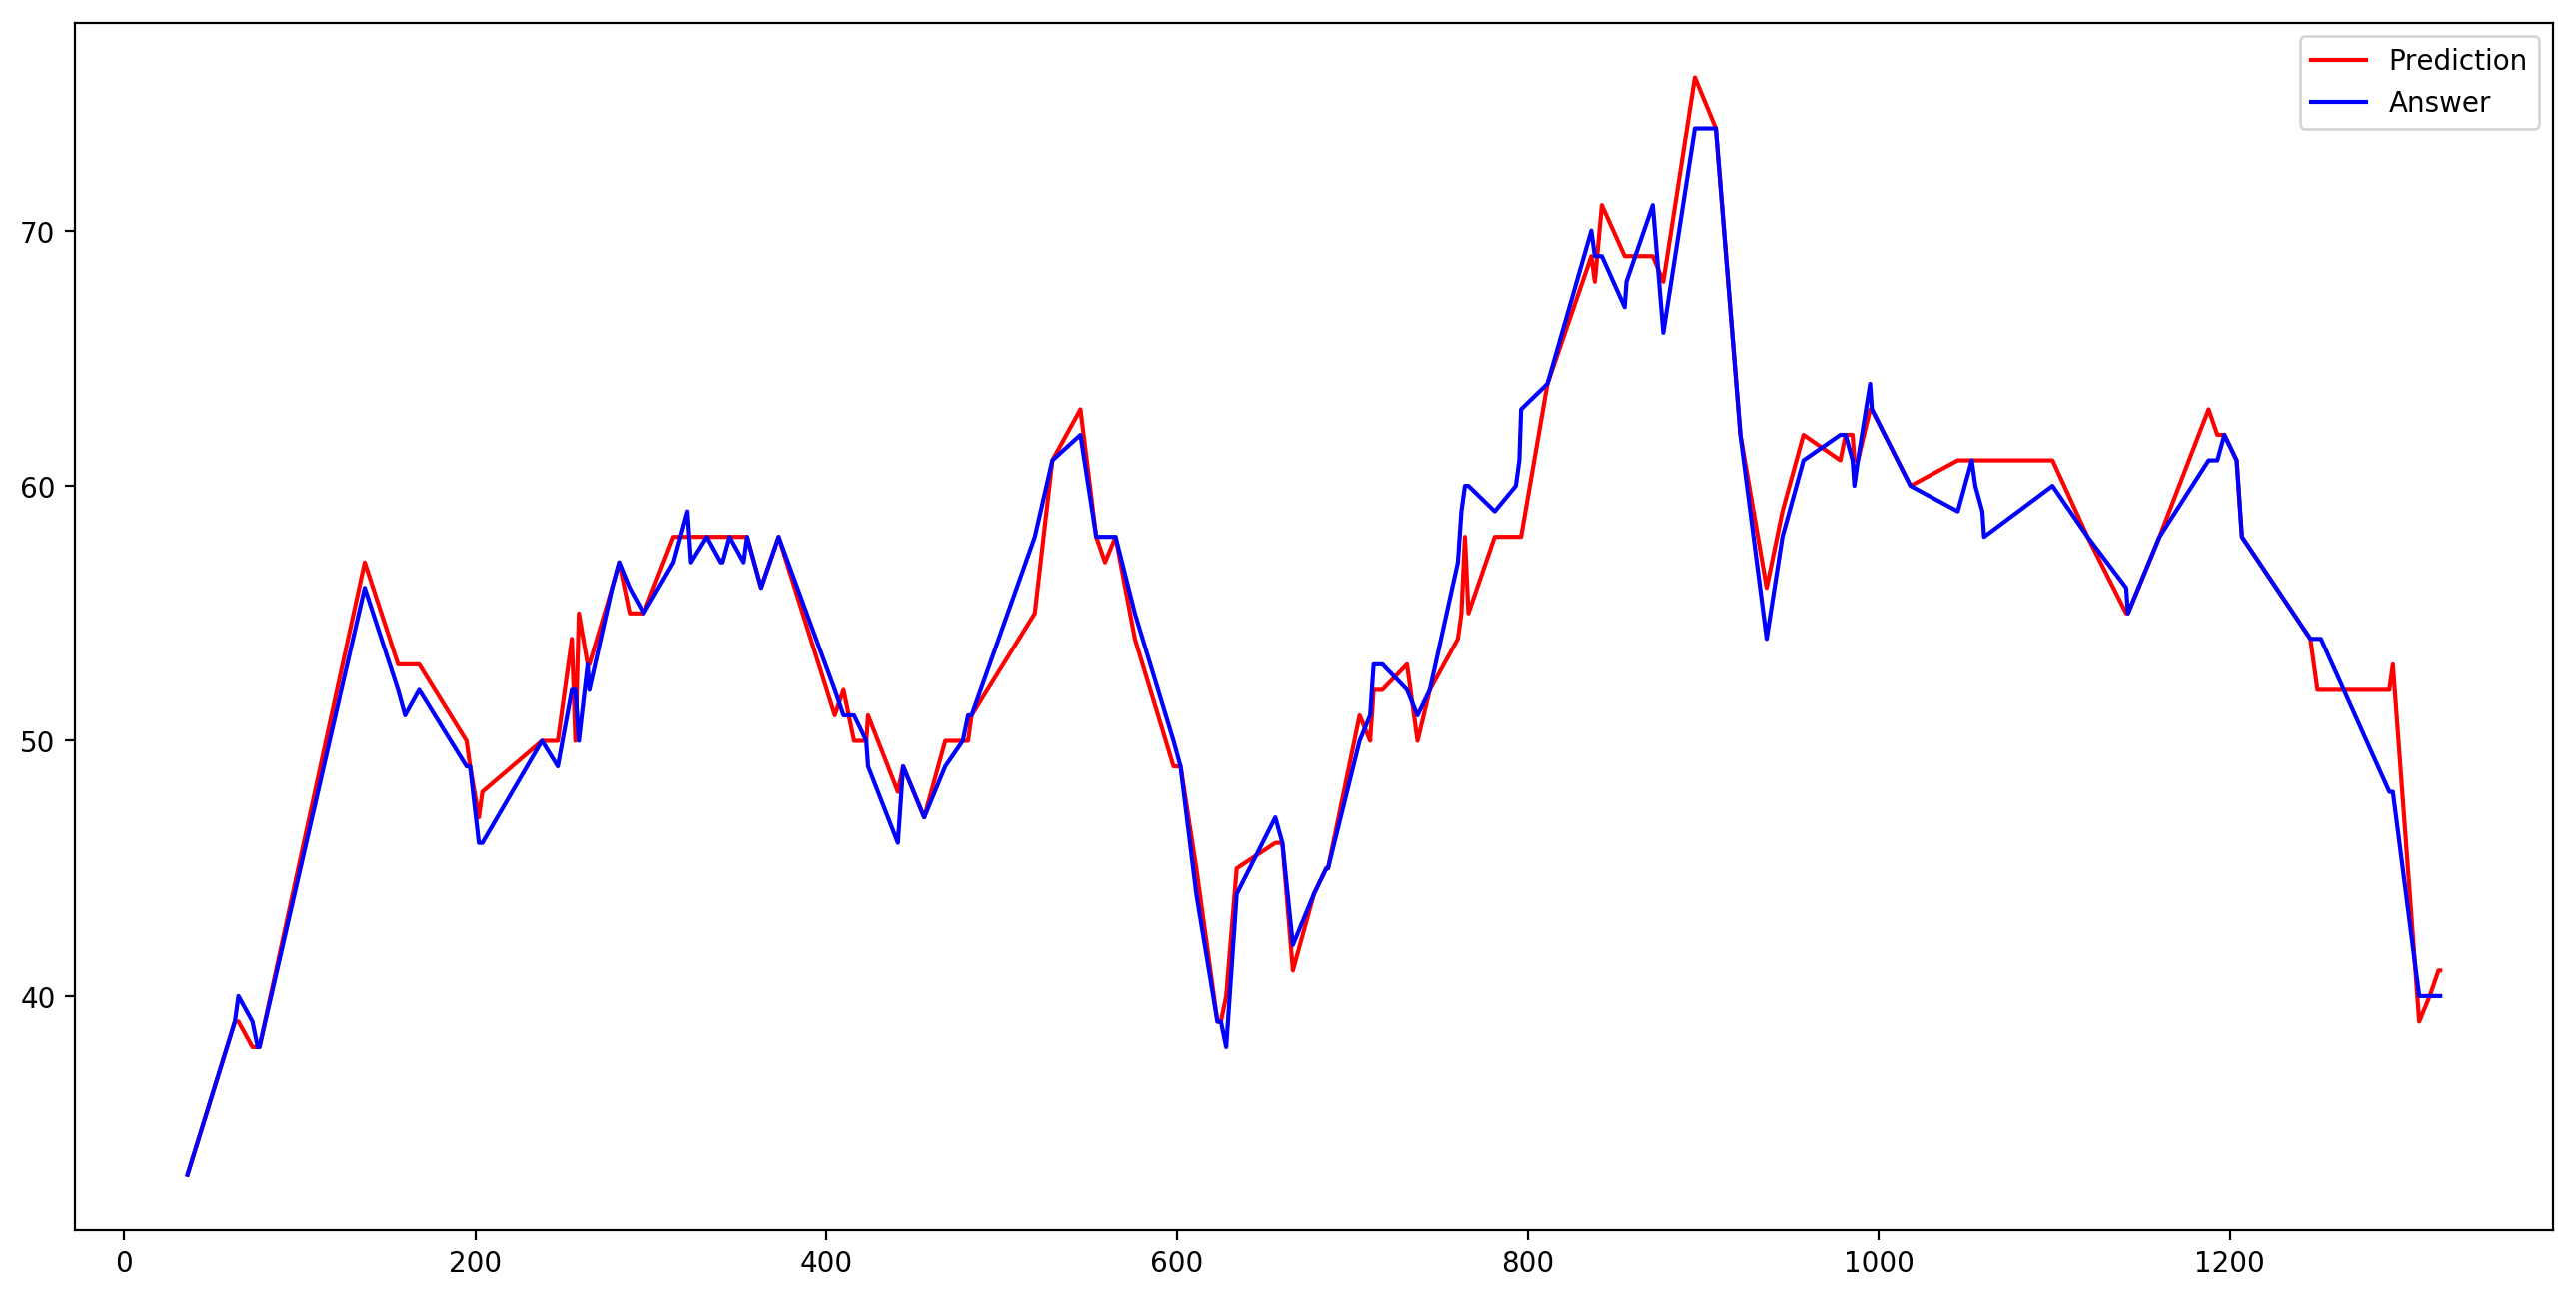

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.figure(figsize=(16,8),dpi = 200)
plt.plot(df1['predicted'],color='red', label='Prediction')
plt.plot(df1["test_y"],color='blue', label='Answer')
plt.legend(loc='best')
plt.show()

## 接下來我們來看看LSTM測試是否會比RF準確!

In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import talib as ta
import pandas_datareader as data
import pandas_datareader.data as web
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

## 匯入資料

In [2]:
import pandas as pd
df= pd.read_csv("INT_bird.csv",engine="python" )
df.columns=['code','name','date','open','low','high','close','volume']
df.dropna(how='any',inplace=True)
df.drop(['code','name'],axis=1,inplace=True)
df = df.set_index(['date'])
df.head()

,open,low,high,close,volume
date,,,,,
20130102,32,31,32,32,1595
20130103,32,32,32,32,1552
20130104,32,32,32,32,1324
20130107,32,32,32,32,676
20130108,32,31,32,31,1006


## 資料正規化

In [3]:

from sklearn import preprocessing
def normalize(df):
    newdf= df.copy()
    min_max_scaler = preprocessing.MinMaxScaler()
    
    newdf['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    newdf['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    newdf['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    newdf['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    newdf['close'] = min_max_scaler.fit_transform(df.close.values.reshape(-1,1))
    
    return newdf
df_norm= normalize(df)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
df_norm.head()

,open,low,high,close,volume
date,,,,,
20130102,0.042553,0.021739,0.042553,0.042553,0.073630
20130103,0.042553,0.043478,0.042553,0.042553,0.071406
20130104,0.042553,0.043478,0.042553,0.042553,0.059617
20130107,0.042553,0.043478,0.042553,0.042553,0.026112
20130108,0.042553,0.021739,0.042553,0.021277,0.043175


## 資料建構

In [5]:
import numpy as np
def data_helper(df, time_frame):
    
    # 資料維度: 開盤價、收盤價、最高價、最低價、成交量, 5維
    number_features = len(df.columns)
    # 將dataframe 轉成 numpy array
    datavalue = df.as_matrix()
    result = []
    # 若想要觀察的 time_frame 為5天, 需要多加一天做為驗證答案
    for index in range( len(datavalue) - (time_frame+1) ): # 從 datavalue 的第0個跑到倒數第 time_frame+1 個
        result.append(datavalue[index: index + (time_frame+1) ]) # 逐筆取出 time_frame+1 個K棒數值做為一筆 instance
    
    result = np.array(result)
    number_train = round(0.9 * result.shape[0]) # 取 result 的前90% instance做為訓練資料
    
    x_train = result[:int(number_train), :-1] # 訓練資料中, 只取每一個 time_frame 中除了最後一筆的所有資料做為feature
    y_train = result[:int(number_train), -1][:,-1] # 訓練資料中, 取每一個 time_frame 中最後一筆資料的最後一個數值(收盤價)做為答案
    
    # 測試資料
    x_test = result[int(number_train):, :-1]
    y_test = result[int(number_train):, -1][:,-1]
    
    # 將資料組成變好看一點
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], number_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], number_features))  
    return [x_train, y_train, x_test, y_test]
# 以5天為一區間進行股價預測
x_train, y_train, x_test, y_test = data_helper(df_norm, 5)

## Keras 模型建立

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import keras
def build_model(input_length, input_dim):
    d = 0.3
    model = Sequential()
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(Dropout(d))
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=False))
    model.add(Dropout(d))
    model.add(Dense(16,kernel_initializer="uniform",activation='relu'))
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    return model
# 5天、5維
model = build_model( 5 , 5 )

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## LSTM 模型訓練

In [7]:
# 一個batch有128個instance，總共跑50個迭代

model.fit( x_train, y_train, batch_size=128, epochs=50, validation_split=0.1, verbose=1)

Train on 1081 samples, validate on 121 samples
Epoch 1/50
1081/1081 [==============================] - 2s 2ms/step - loss: 0.0166 - acc: 9.2507e-04 - val_loss: 0.0059 - val_acc: 0.0000e+00
Epoch 2/50
1081/1081 [==============================] - 1s 1ms/step - loss: 0.0091 - acc: 9.2507e-04 - val_loss: 0.0056 - val_acc: 0.0000e+00
Epoch 3/50
1081/1081 [==============================] - 1s 1ms/step - loss: 0.0085 - acc: 9.2507e-04 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 4/50
1081/1081 [==============================] - 1s 1ms/step - loss: 0.0081 - acc: 9.2507e-04 - val_loss: 0.0059 - val_acc: 0.0000e+00
Epoch 5/50
1081/1081 [==============================] - 2s 1ms/step - loss: 0.0077 - acc: 9.2507e-04 - val_loss: 0.0069 - val_acc: 0.0000e+00
Epoch 6/50
1081/1081 [==============================] - 1s 1ms/step - loss: 0.0076 - acc: 9.2507e-04 - val_loss: 0.0057 - val_acc: 0.0000e+00
Epoch 7/50
1081/1081 [==============================] - 1s 1ms/step - loss: 0.0072 - acc: 9.2507e-04 

In [8]:
#LSTM 模型預測股價及還原數值

def denormalize(df, norm_value):
    original_value = df['close'].values.reshape(-1,1)
    norm_value = norm_value.reshape(-1,1)
    
    min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler.fit_transform(original_value)
    denorm_value = min_max_scaler.inverse_transform(norm_value)
    
    return denorm_value
# 用訓練好的 LSTM 模型對測試資料集進行預測
pred = model.predict(x_test)
# 將預測值與正確答案還原回原來的區間值
denorm_pred = denormalize(df, pred)
denorm_ytest = denormalize(df, y_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## LSTM 預測股價結果

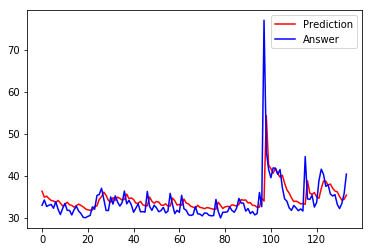

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.plot(denorm_pred,color='red', label='Prediction')
plt.plot(denorm_ytest,color='blue', label='Answer')
plt.legend(loc='best')
plt.show()

-----------------------------------------------
# 總結

> ## 從上述我們可以看到，整體而言，RF預測出來的準確度以及圖形的配適度比LSTM準確。因為RF在處理眾多變量需要降維的時候，效果會比較好。但是它的缺點是無法控制模型內部運行，只能在不同的參數和隨機種子來進行嘗試。而LSTM的模型是以時間序列的概念進行預測，因此模型相較於RF會比較複雜，需要調整的參數較多。經過兩種的模型測試後，我們了解到RF和LSTM沒有哪一個是絕對的比較準確，需要考慮到讀者想處理的資料是怎樣的型態以及維度，再從中挑選適合的模型!

-----------------------------------------------------------


>- ## 補充-關於優化器的選擇(Adam)

>#### 在LSTM的運算過程中，因為我們的資料量不是很龐大且考慮的參數也較少，如果需要更快的收斂或是訓練更複雜的神經網路，適合選擇stepsize較好的優化器，因此我們採用的優化器是Adam。

>#### Adam是從兩個算法延伸而來：AdaGrad和RMSProp，它集合了2個算法的主要優點，並且做了一些修飾，而公式如下：

>#### ![Alt text](https://i.imgur.com/6FNRv13.png/to/)
> 文獻參考: Adam: A Method for Stochastic Optimization/ Diederik P. Kingma, Jimmy Ba /(Submitted on 22 Dec 2014 (v1), last revised 30 Jan 2017 (this version, v9))


## 參考連結:
> ### 1.   Random Forest
    > ### https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda
    
    > ### http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

    > ### https://github.com/ChenHandsomeboy/Team_Project/blob/master/%E6%9C%9F%E6%9C%ABproject/%E6%9C%9F%E6%9C%AB%E5%A0%B1%E5%91%8A.ipynb

> ### 2.   LSTM ( Long Short Term Memory)
    > ### https://read01.com/zh-tw/70nBKn.html#.WzJP-9IzZPZ
    
> ### 3.   優化器的選擇-Adam
    > ### http://www.redcedartech.com/pdfs/Select_Optimization_Method.pdf
    > ### https://arxiv.org/abs/1412.6980
    > ### https://blog.csdn.net/aliceyangxi1987/article/details/73210204
    > ### https://segmentfault.com/a/1190000012668819
>
> ### 比較兩種模型預測股價效果比較好，並探討背後預測能力較高的原因。

------------------------------------------------------------------------